In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
import numpy as np
mnist.target = mnist.target.astype(np.int64)

In [4]:
print(mnist.data.shape, mnist.data.dtype)
print(mnist.target.shape, mnist.target.dtype)

(70000, 784) float64
(70000,) int64


In [5]:
x = mnist.target[:10]
print(x)
list_unsorted = [(target, i) for i, target in enumerate(x)]
print(list_unsorted, type(list_unsorted))
list_sorted = sorted([(target, i) for i, target in enumerate(x)])
print(list_sorted, type(list_sorted))
np_array_sorted = np.array(list_sorted)
print(np_array_sorted, type(np_array_sorted))
idx = np_array_sorted[:,1]
print(idx, type(idx))
x_sorted = x[idx]
print(x_sorted, type(x_sorted))

[5 0 4 1 9 2 1 3 1 4]
[(5, 0), (0, 1), (4, 2), (1, 3), (9, 4), (2, 5), (1, 6), (3, 7), (1, 8), (4, 9)] <class 'list'>
[(0, 1), (1, 3), (1, 6), (1, 8), (2, 5), (3, 7), (4, 2), (4, 9), (5, 0), (9, 4)] <class 'list'>
[[0 1]
 [1 3]
 [1 6]
 [1 8]
 [2 5]
 [3 7]
 [4 2]
 [4 9]
 [5 0]
 [9 4]] <class 'numpy.ndarray'>
[1 3 6 8 5 7 2 9 0 4] <class 'numpy.ndarray'>
[0 1 1 1 2 3 4 4 5 9] <class 'numpy.ndarray'>


In [6]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [7]:
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

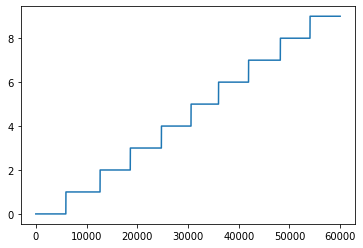

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(mnist.target[:60000])
plt.show()

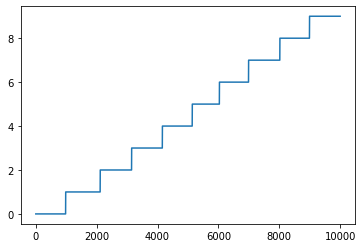

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(mnist.target[60000:])
plt.show()

In [10]:
X, y = mnist["data"], mnist["target"]
# X, y = mnist.data, mnist.target
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(70000, 784) float64
(70000,) int64


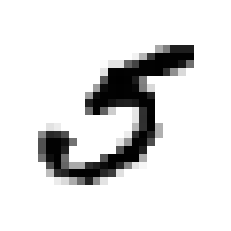

In [11]:
some_digit = X[36000] # (784,)
some_digit_image = some_digit.reshape((28, 28))
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.savefig("some_digit_plot", format='png', dpi=300)
plt.show()

In [12]:
import matplotlib as mpl
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [13]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

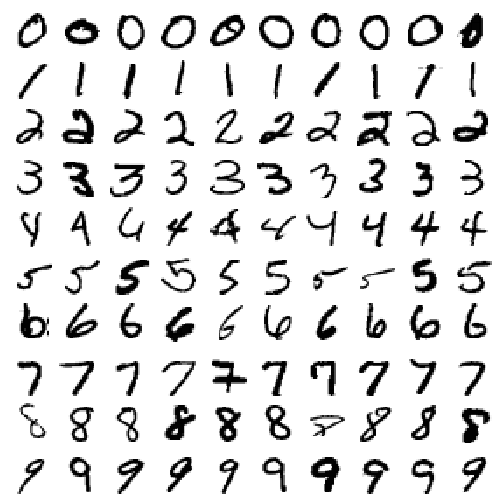

In [14]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.savefig("more_digits_plot", format='png', dpi=300)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [16]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
shuffle_index = np.random.permutation(10000)
X_test, y_test = X_test[shuffle_index], y_test[shuffle_index]
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
y_train_5[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [19]:
# train
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5) # train

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
# test
(y_test_5 == sgd_clf.predict(X_test)).astype(np.float64).sum() / 10000

0.9453

In [21]:
sgd_clf.predict(X[10:20]) # (10,784) <--- rank 2

array([False, False, False, False, False, False, False, False, False,
       False])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95467044, 0.9585    , 0.91741667, 0.92      , 0.96208017])

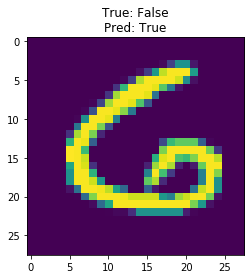

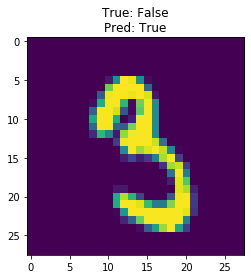

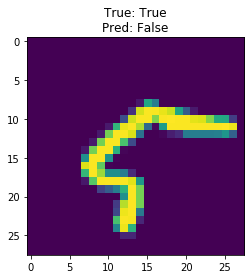

In [22]:
idx = 0
for i in range(3):
    while y_test_5[idx] == sgd_clf.predict([X_test[idx]])[0]:
        idx += 1
    plt.imshow(X_test[idx].reshape((28,28)))
    plt.title('True: {}\nPred: {}'.format(y_test_5[idx], sgd_clf.predict([X_test[idx]])[0]))
    plt.show()
    idx += 1

In [23]:
np.zeros((2,3)).astype(np.bool)

array([[False, False, False],
       [False, False, False]])

In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.90783333, 0.91233333, 0.91091667, 0.91008333, 0.90708333])

In [26]:
(y_test_5 == never_5_clf.predict(X_test)).astype(np.float64).sum() / 10000

9108.0

In [27]:
from sklearn.metrics import confusion_matrix
y_test_pred = sgd_clf.predict(X_test)
# confusion_matrix(y_test_5, y_test_pred)
cm = confusion_matrix(y_test_5, y_test_pred)
print(cm)

[[8658  450]
 [  97  795]]


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
precision = precision_score(y_test_5, y_test_pred)
print(precision_score(y_test_5, y_test_pred))
print(cm[1,1]/cm[:,1].sum())

0.6385542168674698
0.6385542168674698


In [31]:
recall = recall_score(y_test_5, y_test_pred)
print(recall)
print(cm[1,1]/cm[1].sum())

0.8912556053811659
0.8912556053811659


In [32]:
f1 = f1_score(y_test_5, y_test_pred)
print(f1)
print(2/(1/precision+1/recall))

0.7440336920917174
0.7440336920917173


In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([277869.63720471])

In [43]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [44]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [47]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
print(y_scores.shape)
print(y_scores[0])

(60000,)
-251220.02716116255


In [34]:
y_test_scores = sgd_clf.decision_function(X_test)
y_test_scores.shape

(10000,)

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_test_5, y_test_scores)
print(precisions.shape, recalls.shape, thresholds.shape)
print(precisions[-1], recalls[-1])

(9678,) (9678,) (9677,)
1.0 0.0


In [52]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_train_5, y_scores)
print(precisions.shape, recalls.shape, thresholds.shape)
print(precisions[-1], recalls[-1])

(59743,) (59743,) (59742,)
1.0 0.0


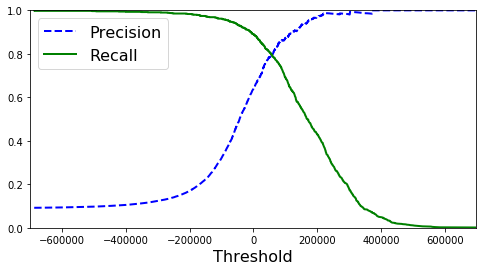

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 
             "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], 
             "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

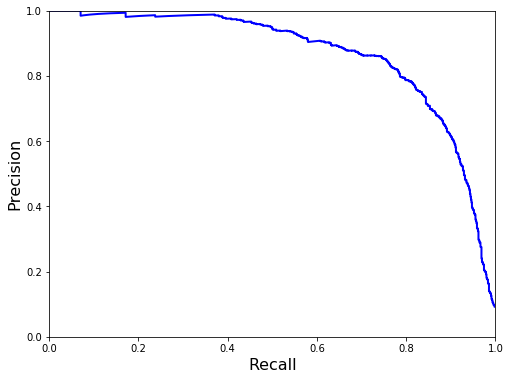

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_5, y_test_scores)

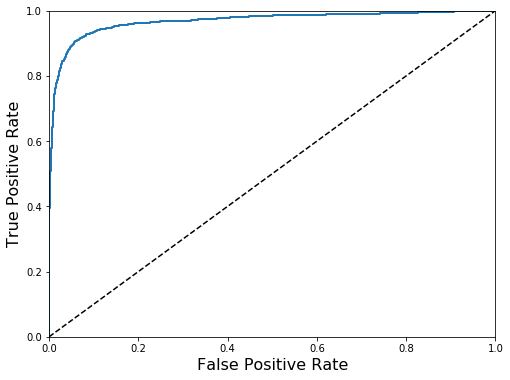

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, y_test_scores)

0.9678336789615791

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
y_test_scores_forest = forest_clf.predict(X_test, method="predict_proba")
y_test_scores_forest[0]

TypeError: predict() got an unexpected keyword argument 'method'